In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

flow = pd.read_csv('CurrentWater.csv')
rain = pd.read_csv('CurrentPrecip.csv',index_col=0)
rainforecast = pd.read_csv('WeatherForecast.csv',index_col=0)
reference = pd.read_csv('RiverReferenceTable.csv')

flow = flow.set_index('Name').join(reference[['USGS Name','Name']].set_index('USGS Name')).reset_index()
flow['CFS'] = flow.Value
flow['DateTime'] = pd.to_datetime(flow.DateTime)
flow['Date'] = flow.DateTime.dt.date
flow = flow[['Date','Name','CFS']].groupby(['Date','Name']).mean().reset_index()
flow['Date_Name'] = flow.Date.astype(str)+'_'+flow.Name


rain = rain.drop_duplicates()
rain['Date_Name'] = rain.Date+'_'+rain.Name
rain['Date'] = pd.to_datetime(rain.Date)
rain['Date'] = rain.Date.dt.date
rain = rain[['Date_Name','Date','Name','Precip']].groupby(['Date','Name','Date_Name']).mean().reset_index()

df = flow.set_index('Date_Name').join(rain[['Date_Name','Precip']].set_index('Date_Name'))
RiverList = df.Name.unique()
df.head()

,Date,Name,CFS,Precip
Date_Name,,,,
2021-12-04_East Fork Carson,2021-12-04,East Fork Carson,85.455000,NaN
2021-12-04_East Walker,2021-12-04,East Walker,23.400000,NaN
2021-12-04_Eel River Fort Seward,2021-12-04,Eel River Fort Seward,558.750000,NaN
2021-12-04_Eel River Scotia,2021-12-04,Eel River Scotia,911.500000,NaN
2021-12-04_Hat Creek,2021-12-04,Hat Creek,56.240625,NaN


In [7]:
rain[['Name','Precip']].loc[rain.Precip.isnull()==False].groupby('Name').count().sort_values('Precip')

,Precip
Name,
Hat Creek,4
North Umpqua River Winchester,27
Smith River Fort Dick,31
Smith River CC,31
East Fork Carson,32
Redwood Creek Orick,36
Eel River Fort Seward,39
Mattole River Ettersburg,39
North Fork American River,40


<AxesSubplot:xlabel='Date', ylabel='Precip'>

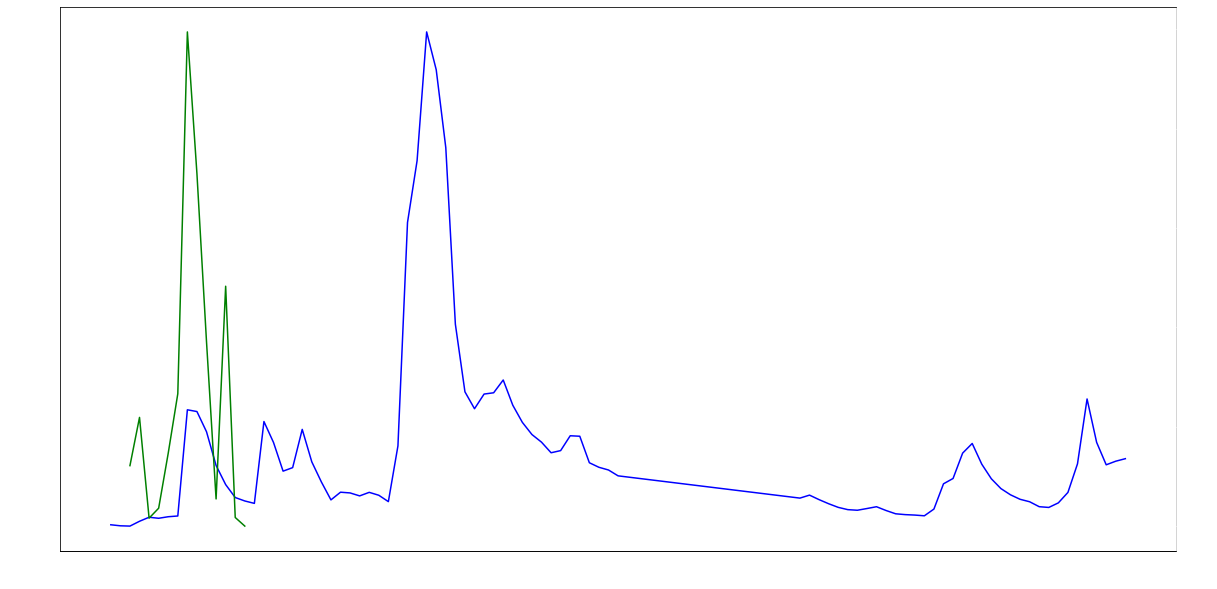

In [8]:

rainflows = df.loc[(df.Name=='North Umpqua River Winchester')]

fig, ax = plt.subplots(figsize=(20,10))
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')     


ax.tick_params(axis='x', colors='white')  
ax.tick_params(axis='y', colors='white')  

ax.spines['left'].set_color('white')        
ax.spines['top'].set_color('white')


sns.lineplot(data=rainflows,x='Date',y='CFS',color='b')

ax2 = plt.twinx()

ax2.yaxis.label.set_color('white')
ax2.spines['right'].set_color('white') 
ax2.tick_params(axis='y', colors='white')

sns.lineplot(data=rainflows,x='Date',y='Precip',color='g',ax=ax2)